In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Equação de movimento

\begin{align*}
\dot{\mathbf{y}} = \begin{bmatrix} \dot \theta \\ \dot \omega \end{bmatrix} = \begin{bmatrix} \omega \\ \alpha \end{bmatrix} = \begin{bmatrix} \omega \\  \displaystyle \frac{1}{2} \left( \Omega^2 + \frac{k}{m} \right) \sin (2 \theta) - \left(\frac{g}{d} + \frac{k}{m} \right) \sin \theta - \frac{b}{m d^2} \omega \end{bmatrix}
\end{align*}

Na rotina abaixo utilizamos a função `solve_ivp` do pacote `scipy.integrate` para a solução numérica desta equação diferencial ordinária.

In [2]:
# parameters
m = 1.0                     # [kg]
g = 9.81                    # [N/kg]
k = 100000                  # [N/m]
Ω = 1000 * 2 * np.pi/60     # [rad/s]
d = 0.10                    # [m]
b = 0.001                   # [N*s*m]
tf = 100                    # [s]

ωn = np.sqrt(k/m)
ωp = np.sqrt(g/d)

In [3]:
# ODE
def Dy(t, y, Ω, k, m, g, d, b):
    θ, ω = y
    return [ω, (0.5 * (Ω*Ω + k/m) * np.sin(2*θ) - (g/d + k/m) * np.sin(θ) - (b/(m * d * d)) * ω)]

In [4]:
# solve ODE
sol = solve_ivp(Dy, [0, tf], [np.pi/6, 0], args=(Ω, k, m, g, d, b), method='Radau', dense_output=True)

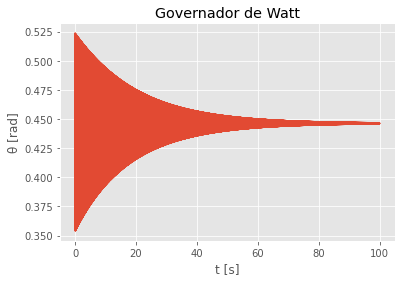

In [5]:
# post-processing
t = np.linspace(0, tf, 100000)
y = sol.sol(t)
θ = y[0]

plt.style.use('ggplot')
plt.plot(t, θ)
plt.xlabel('t [s]')
plt.ylabel('θ [rad]')
plt.title('Governador de Watt')
plt.show()

In [6]:
θ_e = np.arccos((ωn*ωn + ωp*ωp)/(ωn*ωn + Ω*Ω))
θ_e

0.44627952414750444

### Equação linearizada de movimento

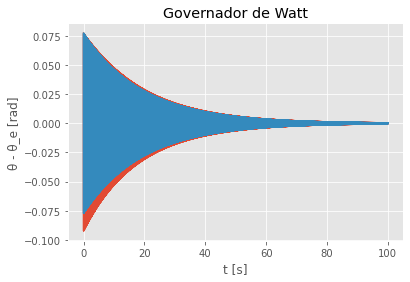

In [7]:
# parameters of the linearized model
ωl = np.sqrt((Ω*Ω - ωp*ωp) * (Ω*Ω + 2*ωn*ωn + ωp*ωp)/(ωn*ωn + Ω*Ω))
ζl = (b/(m * d * d))/(2 * ωl)

# ODE
def Dy_l(t, y, ωl, ζl):
    θ, ω = y
    return [ω, (- ωl * ωl * θ - 2 * ζl * ωl * ω)]

# solve ODE
sol_l = solve_ivp(Dy_l, [0, tf], [np.pi/6 - θ_e, 0], args=(ωl, ζl), method='Radau', dense_output=True)

# post-processing
y_l = sol_l.sol(t)
θ_l = y_l[0]

plt.style.use('ggplot')
plt.plot(t, θ - θ_e)
plt.plot(t, θ_l)
plt.xlabel('t [s]')
plt.ylabel('θ - θ_e [rad]')
plt.title('Governador de Watt')
plt.show()